In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [3]:
movies_metadata = catalog.load("movies_metadata")

print(movies_metadata.head())

[10/31/25 15:33:20] INFO     Loading data from movies_metadata (CSVDataset)...                 ]8;id=835919;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=740416;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

In [4]:
# Revisar columnas
print(movies_metadata.columns)

# Crear main_genre
import ast

def get_main_genre(genre_str):
    try:
        genres = ast.literal_eval(genre_str)  # Convierte string a lista de diccionarios
        if isinstance(genres, list) and len(genres) > 0:
            return genres[0]['name']  # Tomamos el primer género como principal
        else:
            return None
    except:
        return None

movies_metadata['main_genre'] = movies_metadata['genres'].apply(get_main_genre)

# Revisar si se creó correctamente
print(movies_metadata[['genres', 'main_genre']].head())

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
                                              genres main_genre
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  Animation
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...  Adventure
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...    Romance
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...     Comedy
4                     [{'id': 35, 'name': 'Comedy'}]     Comedy


[10/31/25 16:12:05] INFO     Loading data from movies_metadata (CSVDataset)...                 ]8;id=967637;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=483152;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Accuracy: 0.6383505884435006

Clasificación:
               precision    recall  f1-score   support

           0       0.63      0.74      0.68     11721
           1       0.65      0.53      0.58     10881

    accuracy                           0.64     22602
   macro avg       0.64      0.63      0.63     22602
weighted avg       0.64      0.64      0.63     22602



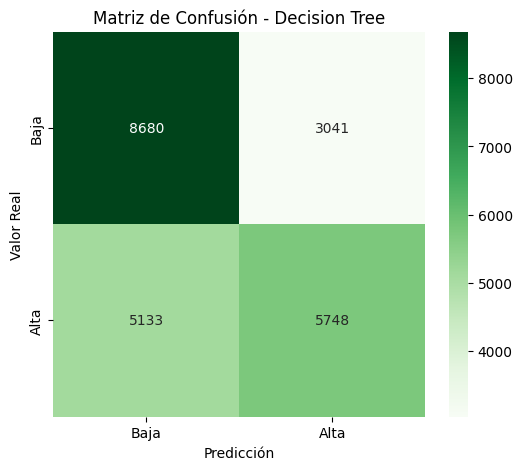

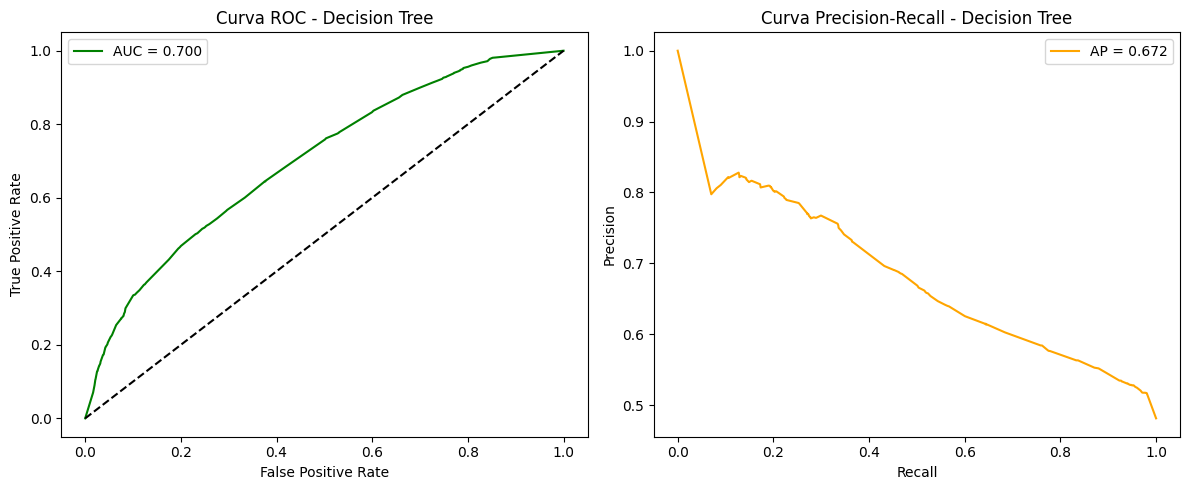

In [8]:
# Importaciones
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
movies_metadata = catalog.load("movies_metadata")

# Crear la variable objetivo 'high_rating'
movies_metadata['high_rating'] = (movies_metadata['vote_average'] > 6).astype(int)

# Seleccionar columnas numéricas
numeric_cols = ['runtime', 'popularity', 'vote_count', 'revenue', 'budget']
movies_metadata[numeric_cols] = movies_metadata[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores nulos
movies_metadata = movies_metadata.dropna(subset=numeric_cols + ['high_rating'])

# Definir X e y
X = movies_metadata[numeric_cols]
y = movies_metadata['high_rating']

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Escalado de características (opcional para árboles, pero lo dejamos igual para consistencia)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo Decision Tree
model = DecisionTreeClassifier(
    criterion='gini',      # criterio de impureza ('gini' o 'entropy')
    max_depth=10,          # límite de profundidad (ajustable)
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = model.predict(X_test_scaled)
y_scores = model.predict_proba(X_test_scaled)[:, 1]

# Métricas de rendimiento
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Baja', 'Alta'], yticklabels=['Baja', 'Alta'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Decision Tree')
plt.show()

# Curva ROC y Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_prec = average_precision_score(y_test, y_scores)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='green')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Decision Tree')
plt.legend()

plt.subplot(1,2,2)
plt.plot(recall, precision, label=f'AP = {avg_prec:.3f}', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Decision Tree')
plt.legend()

plt.tight_layout()
plt.show()


[10/31/25 16:12:23] INFO     Loading data from movies_metadata (CSVDataset)...                 ]8;id=147457;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=738525;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores parámetros encontrados:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

Accuracy final: 0.6389257587824086

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.63      0.74      0.68     11721
           1       0.65      0.53      0.59     10881

    accuracy                           0.64     22602
   macro avg       0.64      0.64      0.63     22602
weighted avg       0.64      0.64      0.63     22602



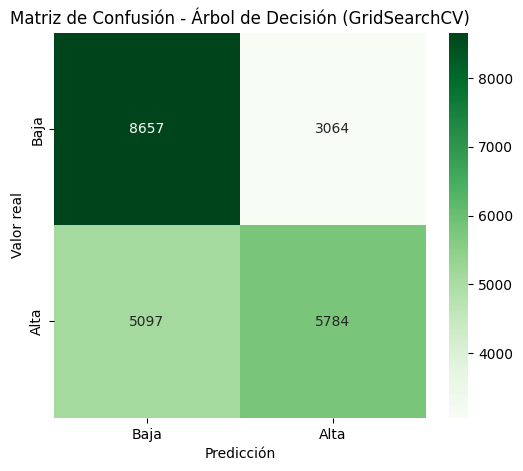

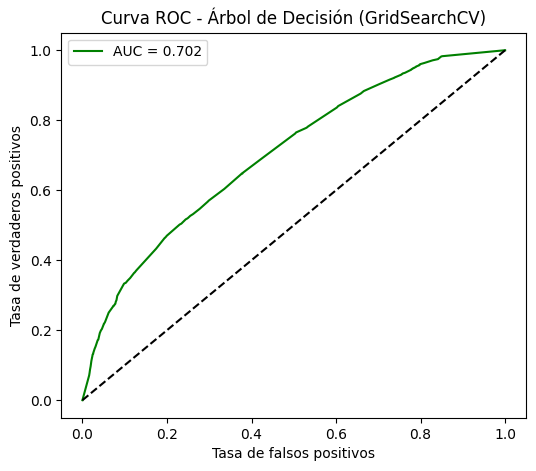

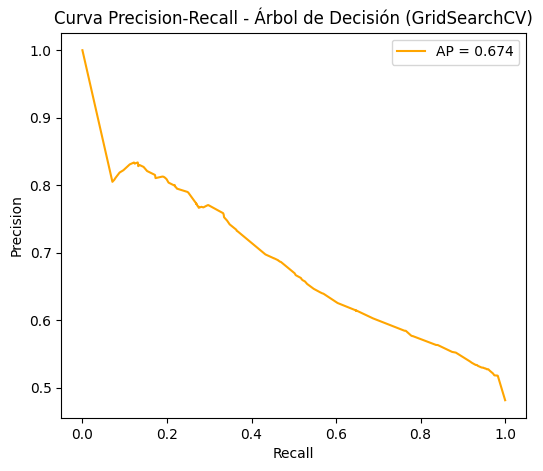

In [9]:
# Importaciones
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
movies_metadata = catalog.load("movies_metadata")

# Crear variable objetivo
movies_metadata['high_rating'] = (movies_metadata['vote_average'] > 6).astype(int)

# Seleccionar columnas numéricas
numeric_cols = ['runtime', 'popularity', 'vote_count', 'revenue', 'budget']
movies_metadata[numeric_cols] = movies_metadata[numeric_cols].apply(pd.to_numeric, errors='coerce')
movies_metadata = movies_metadata.dropna(subset=numeric_cols + ['high_rating'])

# Definir X e y
X = movies_metadata[numeric_cols]
y = movies_metadata['high_rating']

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Escalado (opcional para árboles, pero lo mantenemos por coherencia)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo base
tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Definir la grilla de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# Entrenar con búsqueda de hiperparámetros
grid_search.fit(X_train_scaled, y_train)

# Ver mejores parámetros
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Modelo final con mejores parámetros
best_tree = grid_search.best_estimator_

# Evaluación en test
y_pred = best_tree.predict(X_test_scaled)
y_scores = best_tree.predict_proba(X_test_scaled)[:, 1]

print("\nAccuracy final:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Baja', 'Alta'], yticklabels=['Baja', 'Alta'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Árbol de Decisión (GridSearchCV)')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='green')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC - Árbol de Decisión (GridSearchCV)')
plt.legend()
plt.show()

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_prec = average_precision_score(y_test, y_scores)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'AP = {avg_prec:.3f}', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Árbol de Decisión (GridSearchCV)')
plt.legend()
plt.show()


Análisis del rendimiento del modelo

El modelo de árbol de decisión optimizado mediante GridSearchCV obtuvo un accuracy del 64%, con los mejores hiperparámetros:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

Este rendimiento indica que el modelo logra clasificar correctamente la mayoría de las películas entre alta o baja puntuación, aunque con una precisión y recall moderados en ambas clases:

Precisión clase 0 (Baja): 0.64
Precisión clase 1 (Alta): 0.64
Recall clase 0: 0.71
Recall clase 1: 0.57

El modelo tiene mejor desempeño identificando películas de baja puntuación (clase 0), ya que su recall es más alto. Sin embargo, tiende a confundir algunas películas con puntuaciones altas como bajas, lo que refleja un ligero desequilibrio en la capacidad de predicción entre las dos clases.

Interpretación del resultado

El árbol de decisión logró un desempeño estable y coherente, demostrando que las variables numéricas seleccionadas (vote_count, popularity, runtime y budget) aportan información relevante para estimar la calidad percibida de una película.

Conclusión general

El modelo de árbol de decisión permite responder de forma aceptable a la pregunta de clasificación:

“¿Una película tiene una alta o baja puntuación según su vote_average?”

Con un rendimiento general medio (64%), el modelo puede servir como una herramienta exploratoria inicial, pero no es suficiente para predicciones precisas en un entorno de producción.